In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from imprint.bound import normal, normal2
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

In [4]:
n = jnp.array([5, 3, 10])
theta1 = jnp.array([-0.1, 0.4, 0.2])
theta2 = jnp.array([-0.5, -0.5, -0.5])
v1 = 0.1 * jnp.ones(len(n))
v2 = 0.01 * jnp.ones(len(n))
f0 = 0.025

11.235095


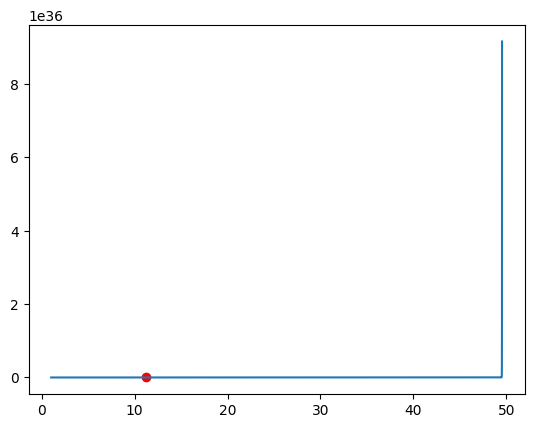

In [7]:
tbf_vmap = jax.vmap(normal2.tilt_bound_fwd_tile, in_axes=(0, None, None, None, None, None, None))
qs = jnp.linspace(1, jnp.min(jnp.where(v2 > 0, -theta2 / v2, 100)), 2000000, endpoint=False)

bounds = tbf_vmap(qs, n, theta1, theta2, v1[None], v2[None], f0)
plt.plot(qs, bounds)

min_bound_idx = jnp.argmin(bounds)
plt.scatter(qs[min_bound_idx], bounds[min_bound_idx], color='r')
print(qs[min_bound_idx])

11.233196


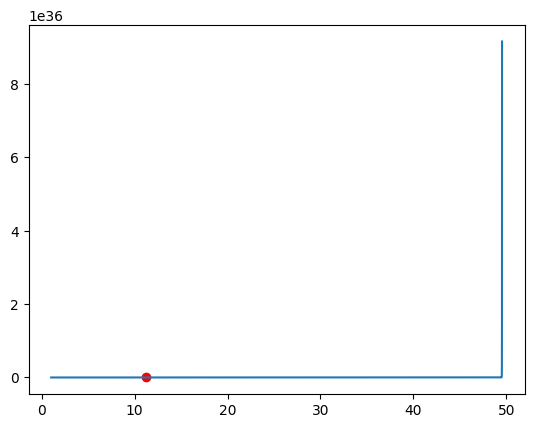

In [8]:
fwd_solver = normal2.TileForwardQCPSolver(n)
q_opt = fwd_solver.solve(theta1, theta2, v1[None], v2[None], f0)
b_opt = normal2.tilt_bound_fwd_tile(q_opt, n, theta1, theta2, v1[None], v2[None], f0)
plt.plot(qs, bounds)
plt.scatter(q_opt, b_opt, color='r')
print(q_opt)

11.933468 0.013448795


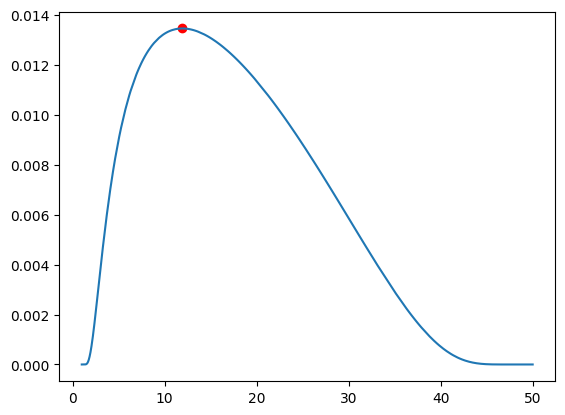

In [9]:
tbb_vmap = jax.vmap(normal2.tilt_bound_bwd_tile, in_axes=(0, None, None, None, None, None, None))

bounds = tbb_vmap(qs, n, theta1, theta2, v1[None], v2[None], f0)
plt.plot(qs, bounds)

max_bound_idx = jnp.argmax(bounds)
plt.scatter(qs[max_bound_idx], bounds[max_bound_idx], color='r')
print(qs[max_bound_idx], bounds[max_bound_idx])

11.9330635


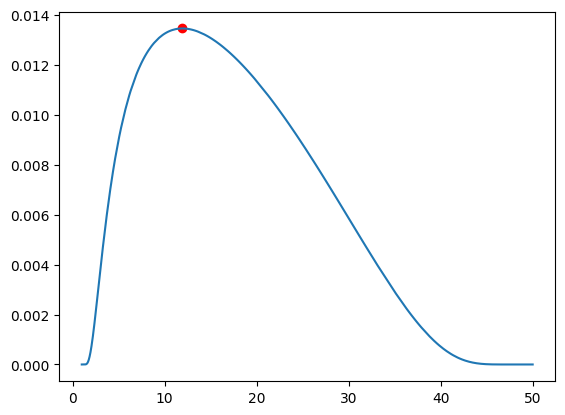

In [10]:
bwd_solver = normal2.TileBackwardQCPSolver(n)
q_opt = bwd_solver.solve(theta1, theta2, v1[None], v2[None], f0)
b_opt = normal2.tilt_bound_bwd_tile(q_opt, n, theta1, theta2, v1[None], v2[None], f0)
plt.plot(qs, bounds)
plt.scatter(q_opt, b_opt, color='r')
print(q_opt)